# Discurso del presidente Andrés Manuel López Obrador durante la VI Cumbre de la Comunidad de Estados Latinoamericanos y Caribeños

In [1]:
import pandas as pd 
import requests as rq
import numpy as np
import collections

In [2]:
#matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib as mlp
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib import rcParams

In [3]:
#getting the speech from the url
website_url = rq.get('https://lopezobrador.org.mx/2021/09/18/discurso-del-presidente-andres-manuel-lopez-obrador-durante-la-vi-cumbre-de-la-celac/').text

In [4]:
from bs4 import BeautifulSoup 
soup = BeautifulSoup(website_url, "lxml")

In [5]:
#retriving text from "p" founds
data = [element.text for element in soup.find_all("p")]
#convert tu string
data = str(data)
data

"['2021: Año de la Independencia', 'Me da gusto encabezar esta reunión de la CELAC.\\xa0', 'Celebro la presencia de Charles Michel, presidente de la Comisión Europea; de Alicia Bárcena de la CEPAL y de presidentes, ministras, ministros, representantes diplomáticos de América Latina y el Caribe.', 'Amigas, amigos todos:', 'La CELAC, en estos tiempos, puede convertirse en el principal instrumento para consolidar las relaciones entre nuestros países de América Latina y el Caribe, y alcanzar el ideal de una integración económica con Estados Unidos y Canadá en un marco de respeto a nuestras soberanías; es decir, construir en el continente americano algo parecido a lo que fue la Comunidad Económica que dio origen a la actual Unión Europea.', 'Es nuestro sentir que este ideal puede convertirse en realidad si pensamos y acordamos sobre tres cuestiones básicas: la no intervención y la autodeterminación de los pueblos; la cooperación para el desarrollo y la ayuda mutua para combatir la desiguald

In [6]:
# Reading data I found "xa0'" as a word, so I replace this with space
data = data.replace(u'.\\xa0', u' ')
data

"['2021: Año de la Independencia', 'Me da gusto encabezar esta reunión de la CELAC ', 'Celebro la presencia de Charles Michel, presidente de la Comisión Europea; de Alicia Bárcena de la CEPAL y de presidentes, ministras, ministros, representantes diplomáticos de América Latina y el Caribe.', 'Amigas, amigos todos:', 'La CELAC, en estos tiempos, puede convertirse en el principal instrumento para consolidar las relaciones entre nuestros países de América Latina y el Caribe, y alcanzar el ideal de una integración económica con Estados Unidos y Canadá en un marco de respeto a nuestras soberanías; es decir, construir en el continente americano algo parecido a lo que fue la Comunidad Económica que dio origen a la actual Unión Europea.', 'Es nuestro sentir que este ideal puede convertirse en realidad si pensamos y acordamos sobre tres cuestiones básicas: la no intervención y la autodeterminación de los pueblos; la cooperación para el desarrollo y la ayuda mutua para combatir la desigualdad y 

In [7]:
#words that we want to ignore
from stop_words import get_stop_words
#spanish stop words
stop_words_es = get_stop_words('es')

In [8]:
from wordcloud import WordCloud, STOPWORDS

stop_words_es

['a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

In [9]:
stop_words = ["año", "mil", "pesos", "ciento", "millones", "tres", "ustedes"] + stop_words_es

amlo_wc = WordCloud(
    background_color = 'white',
    max_words = 2000,
    stopwords = stop_words
)
#generate wordcloud
amlo_wc.generate(data)

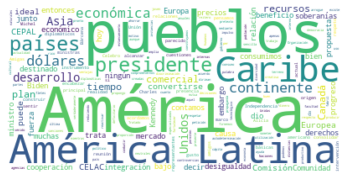

In [10]:
#display the WordCloud
plt.imshow(amlo_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

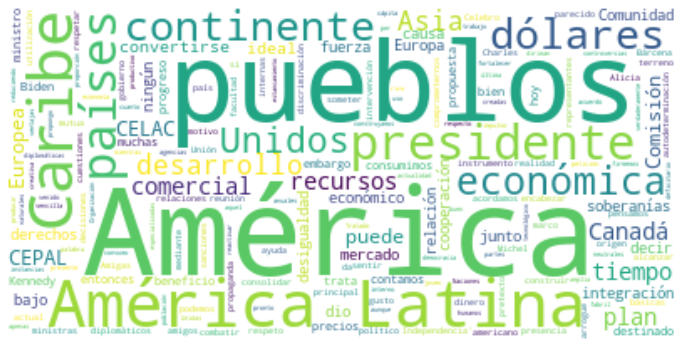

In [11]:
#re generate the word cloud
amlo_wc.generate(data)

#display the cloud
fig = plt.figure()
#set width
fig.set_figwidth(12)
#set height
fig.set_figheight(16)

plt.imshow(amlo_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

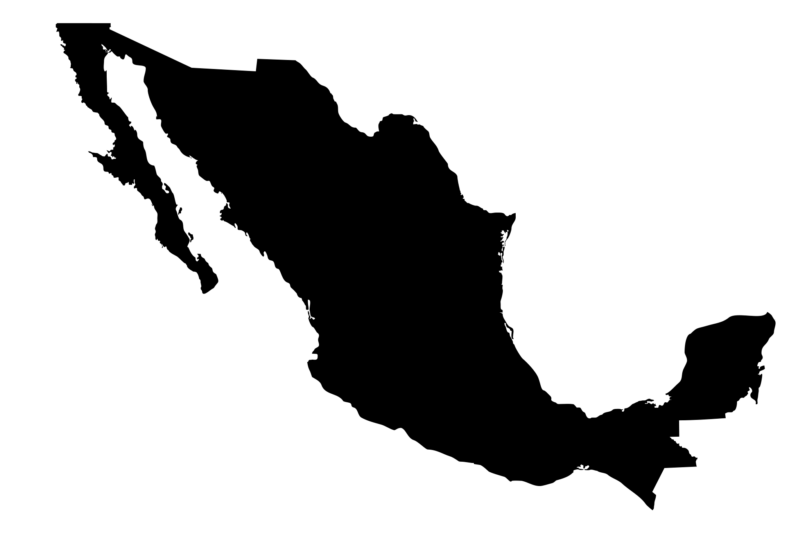

In [12]:
mx_mask = np.array(Image.open('mx-map.png'))

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(mx_mask, cmap=plt.cm.gray, vmin=255, vmax=255, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
amlo_wc_mx = WordCloud(background_color='white', max_words=300, mask=mx_mask, stopwords=stop_words)

amlo_wc_mx.generate(data)

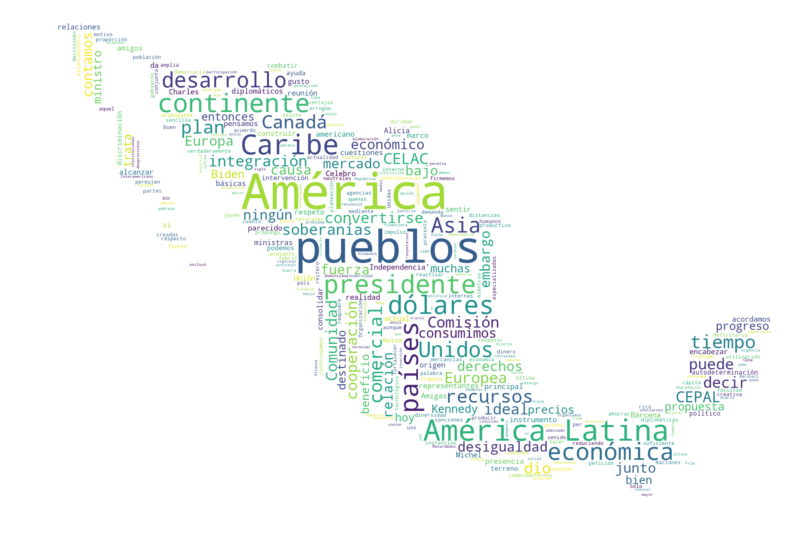

In [14]:
fig_mx = plt.figure()
fig_mx.set_figwidth(14) # set width
fig_mx.set_figheight(18) # set height


plt.imshow(amlo_wc_mx, interpolation='bilinear')
plt.axis('off')
plt.show()